Seaborn，它基于 Matplotlib，用来制作统计图形的 Python 库。

Seaborn 的优势：

图表丰富，比 matplotlib 易用
与 pandas 结合
支持数值类型多变量关系图
支持数值类型数据分布图
支持类别类型数据可视化
支持回归模型以及可视化
轻松构建结构化多图网格

1. 多变量关系图
多变量关系图其实就是二维散点图和线图，可以通过这些函数来绘制：relplot()、scatterplot()和lineplot()。

scatterplot()只能绘制散点图，lineplot()只能绘制线图。

relplot()都可以绘制，通过kind参数来区分：

kind="scatter"（默认）等价于scatterplot()
kind="line"等价于lineplot()
在 seaborn 中，定义一个通用函数并用kind参数指定需要绘制的图形，这种形式很常见。这样做法的好处在于，调用一个函数便可以绘制多种图形。

1.1 绘图

绘制散点图

   Unnamed: 0  PID     county state   area  poptotal   popdensity  popwhite  \
0           0  561      ADAMS    IL  0.052     66090  1270.961540     63917   
1           1  562  ALEXANDER    IL  0.014     10626   759.000000      7054   
2           2  563       BOND    IL  0.022     14991   681.409091     14477   
3           3  564      BOONE    IL  0.017     30806  1812.117650     29344   
4           4  565      BROWN    IL  0.018      5836   324.222222      5264   

   popblack  popamerindian  ...  percprof  poppovertyknown  percpovertyknown  \
0      1702             98  ...  4.355859            63628         96.274777   
1      3496             19  ...  2.870315            10529         99.087145   
2       429             35  ...  4.488572            14235         94.956974   
3       127             46  ...  4.197800            30337         98.477569   
4       547             14  ...  3.367680             4815         82.505140   

   percbelowpoverty  percchildbelowpovert  p

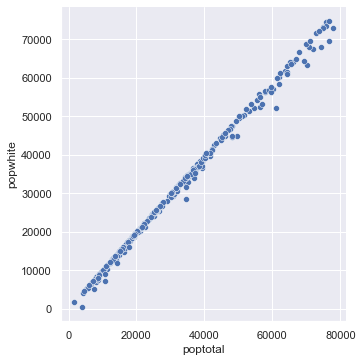

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
sns.set_theme(style="darkgrid")

df = pd.read_csv('data/midwest_filter.csv')
print(df.head())
sns.relplot(x="poptotal", y="popwhite", data=df);

绘制线图

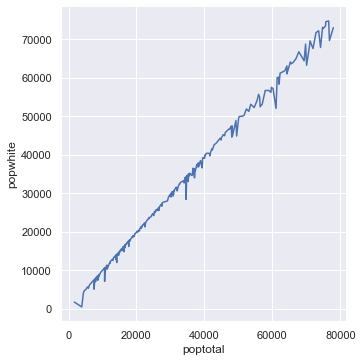

In [2]:
sns.relplot(x="poptotal", y="popwhite", kind="line", data=df)

1.2 常用参数

relplot()函数中有一些常用的参数，可以帮助我们绘制更复杂的图形。

以上面散点图为例，设置hue参数，可以为不同类别的点绘制不同的颜色。

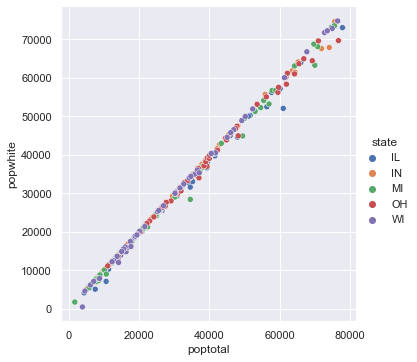

In [3]:
sns.relplot(x="poptotal", y="popwhite", hue="state", data=df);

smoker是tips中的一列，取值为Yes和No，上面散点图中smoker=Yes时点是蓝色，smoker=No时，点是橙色。

设置col参数，可以将数据绘制不同的散点图中

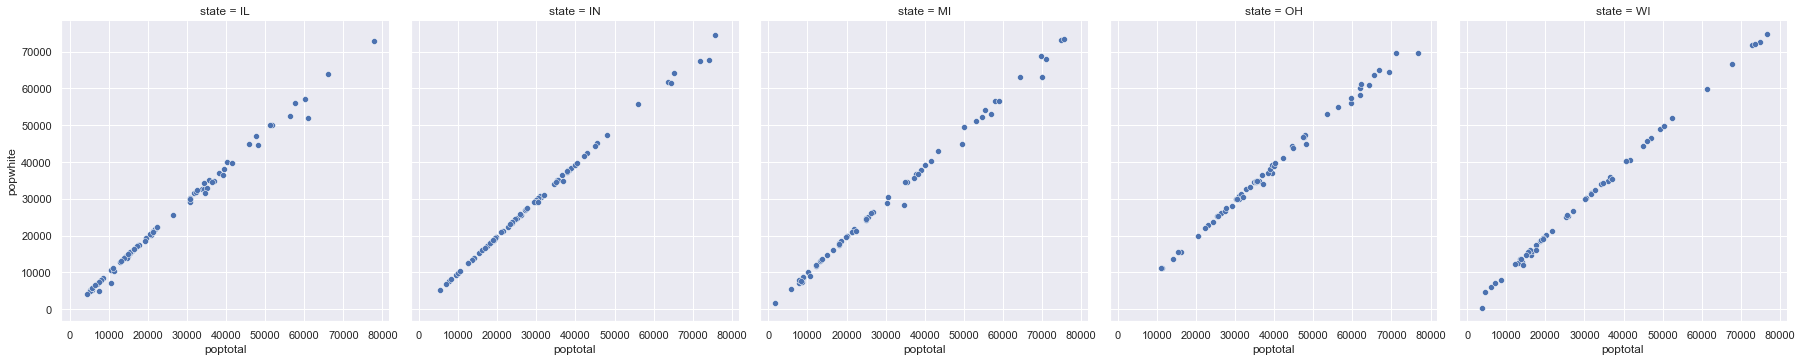

In [4]:
sns.relplot(x="poptotal", y="popwhite", col="state", data=df);

smoker=Yes的数据都绘制在第1行第1列的散点图中；smoker=No的数据都绘制在第1行第2列的散点图中。

设置style参数，可以为不同类别的点绘制不同的形状。

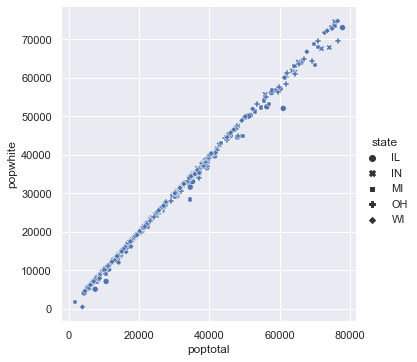

In [5]:
sns.relplot(x="poptotal", y="popwhite", style="state", data=df);

2. 数据分布图
seaborn 提供 histplot()，kdeplot()，ecdfplot()和rugplot()函数，分别绘制直方图、核密度估计图、经验累积分布图和垂直刻度。

分布图的通用函数是displot()，通过指定kind来绘制不同的图：

kind="hist"（默认）等价于histplot()
kind="kde"等价于kdeplot()
kind="ecdf"等价于ecdfplot()
由于rugplot()只是用来标识刻度，它不需要kind指定，而是通过rug=True或rug=False（默认）来指定是否需要显示在图形中。

2.1 直方图

直方图是比较常见的数据分布图，它的绘制也很简单。

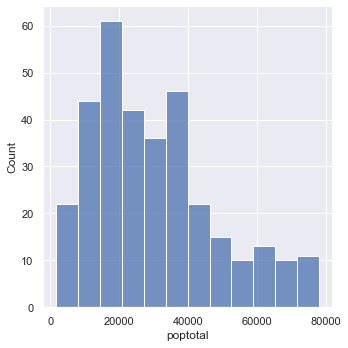

In [6]:
sns.displot(df, x="poptotal")

seaborn 提供了binwidth、bins等参数设置直方图 bin 的宽度和数量，从而绘制不同形状的直方图。

这里也可以设置hue参数，用不同颜色在一张图里绘制不同类别的直方图。当在一张图里绘制多个直方图时，需要设置element和multiple参数来指定多个直方图的组合方式。

如：multiple="stack"代表堆叠显示。

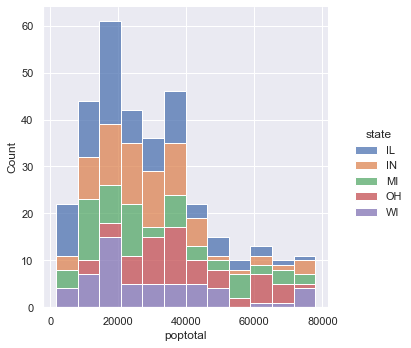

In [7]:
sns.displot(df, x="poptotal", hue="state", multiple="stack")

设置stat参数可以归一化直方图。如：设置stat="probability"可以使条形高度的和为1。

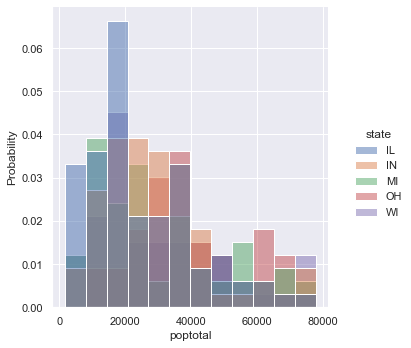

In [8]:
sns.displot(df, x="poptotal", hue="state", stat="probability")

2.2 核密度估计图

直方图的目的是通过分箱和计数观察来近似生成数据的潜在概率密度函数。核密度估计 (KDE) 是为这一问题提供了不同的解决方案。

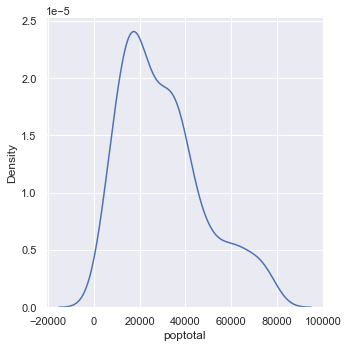

In [9]:
sns.displot(df, x="poptotal", kind="kde")

seaborn 从0.11.0版本开始只支持高斯核函数。

设置bw_adjust参数可以让 KDE 图更平滑。

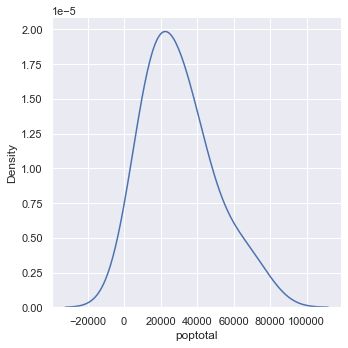

In [10]:
sns.displot(df, x="poptotal", kind="kde", bw_adjust=2)

设置kde=True而不是kind="kde"，可以同时绘制直方图和 KDE 图。

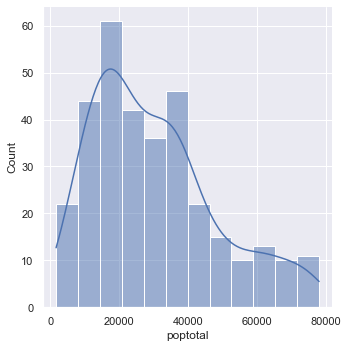

In [11]:
sns.displot(df, x="poptotal", kde=True)

2.3 经验累积分布图

经验累积分布函数（ECDF） 通过每个数据点绘制了一条单调递增的曲线，使得曲线的高度反映了具有较小值的观测值的比例。


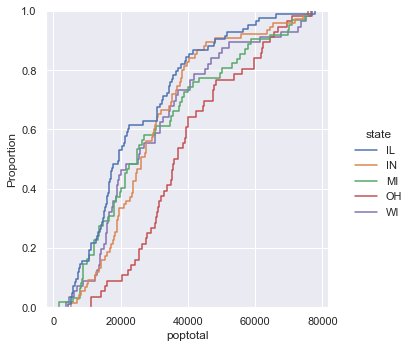

In [12]:
sns.displot(df, x="poptotal", hue="state", kind="ecdf")

2.4 二元分布图

之前绘制的都是单变量分布图，seaborn 也可以绘制两个变量的分布图。

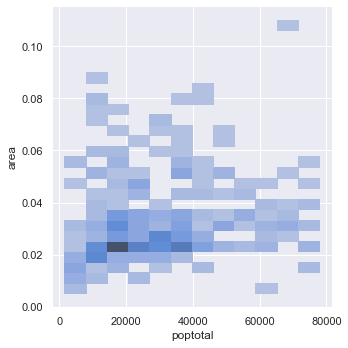

In [13]:
sns.displot(df, x="poptotal", y="area")

用平面图来展示二元直方图只能通过每个方块的颜色深浅定性观察数据的多少。

同样的，也可以绘制二元核密度估计图，画出来的图形是等高线。

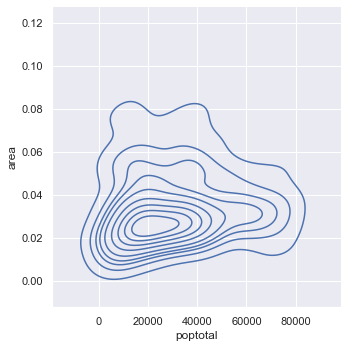

In [14]:
sns.displot(df, x="poptotal", y="area", kind="kde")

设置fill=True，可以通过颜色定性观察面的高度。

seaborn 还提供了 jointplot() 函数为二元变量同时绘制不同图形。

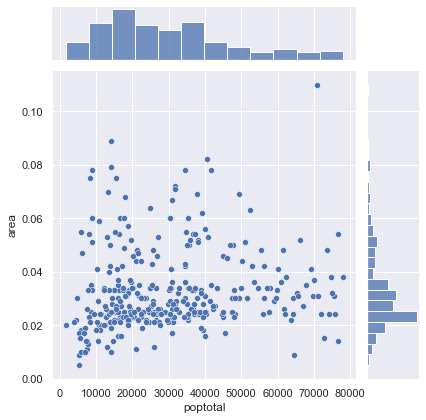

In [15]:
sns.jointplot(data=df, x="poptotal", y="area")

jointplot()默认绘制两变量散点图和单变量直方图。

设置kind=kde来绘制 KDE 图。


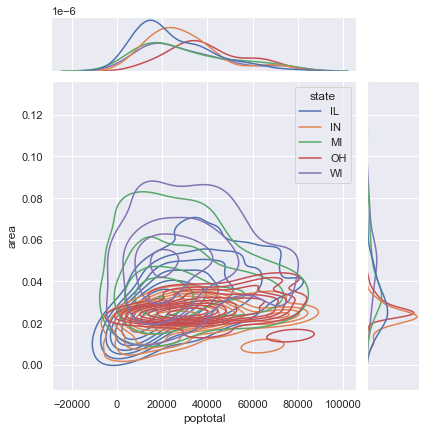

In [16]:
sns.jointplot(
    data=df,
    x="poptotal", y="area", hue="state",
    kind="kde"
)

seanborn 还提供了pairplot()函数，为更多变量绘图。


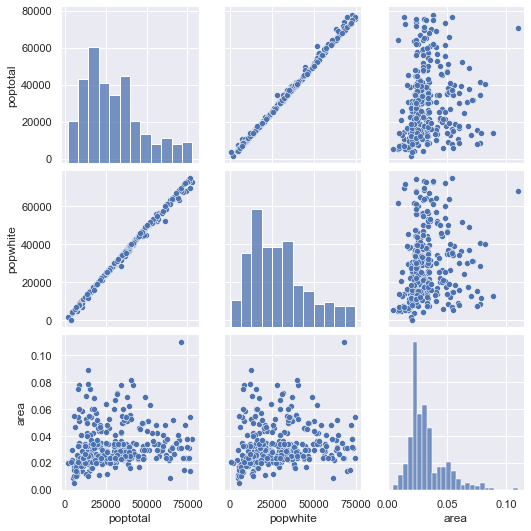

In [19]:
sns.pairplot(df[['poptotal', 'popwhite', 'area']])

默认绘图仍然是直方图和散点图。同样可以设置kind=kde绘制多变量 KDE 图。

3. 分类图
之前我们绘制的关系图都是数值变量，当数据中有类别数据（离散值）时，就需要用分类图来绘制。

seaborn 提供 catplot() 函数来绘制分类图，有以下3种类别

分类散点图

kind="strip"（默认） 等价于 stripplot()
kind="swarm" 等价于 swarmplot()
分类分布图

kind="box" 等价于 boxplot()
kind="violin" 等价于 violinplot()
kind="boxen" 等价于 boxenplot()
分类估计图

kind="point" 等价于 pointplot()
kind="bar" 等价于 barplot()
kind="count" 等价于 countplot()
3.1 分类散点图

catplot()默认使用stripplot()绘图，它会用少量随机"抖动"调整分类轴上的点位置，避免所有的点都重叠在一起。

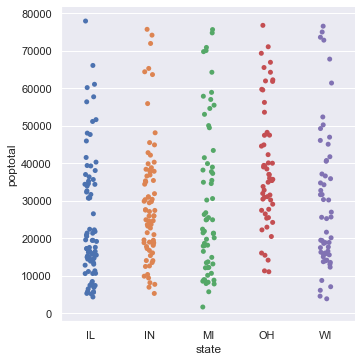

In [20]:
sns.catplot(x="state", y="poptotal", data=df)

设置jitter参数可以控制抖动的幅度，当jitter=False时，代表不抖动，绘制出的图形跟使用关系散点图是一样的。

sns.catplot(x="state", y="poptotal", jitter=False, data=df)
等价于

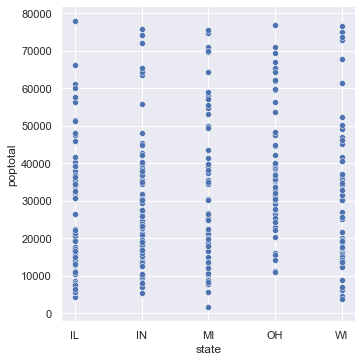

In [21]:
sns.relplot(x="state", y="poptotal", data=df)

可以看到，图上的xy坐标相同的数据重合在一起，非常不方便观察。

虽然jitter可以设置“抖动”，但也有可能造成数据重叠。而kind="swarm"可以绘制非重叠的分类散点图。


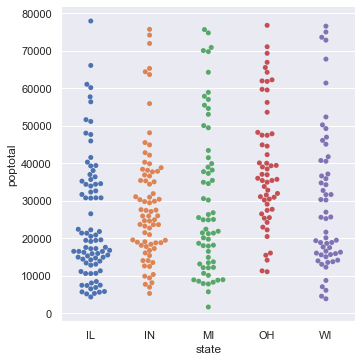

In [22]:
sns.catplot(x="state", y="poptotal", kind="swarm", data=df)

3.2 分类分布图

kind="box" 可以绘制箱线图。


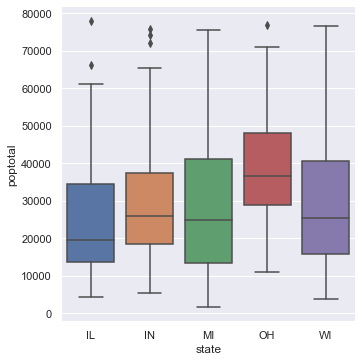

In [23]:
sns.catplot(x="state", y="poptotal", kind="box", data=df)

kind="boxen" 可以绘制增强箱线图。

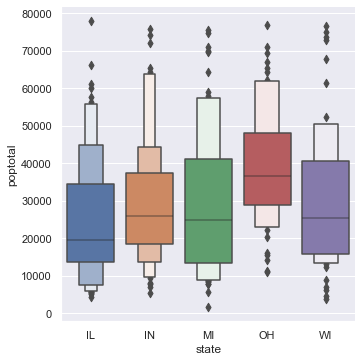

In [24]:
sns.catplot(x="state", y="poptotal", kind="boxen", data=df)

kind="violin" 可以绘制小提琴图。

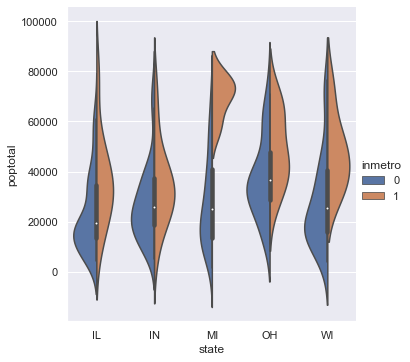

In [25]:
sns.catplot(x="state", y="poptotal", hue="inmetro", kind="violin", split=True, data=df)

3.3 分类估计图

kind="bar" 以矩形条的方式展示数据点估值(默认取平均值)和置信区间,该置信区间使用误差线绘制。

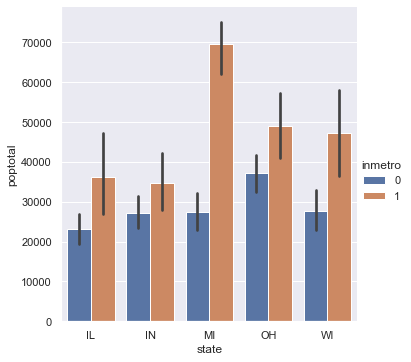

In [26]:
sns.catplot(x="state", y="poptotal", hue="inmetro", kind="bar", data=df)

矩形条的高度是survived列均值，上面的那根天线就是误差线。

kind="count" 是常见的柱状图，统计x坐标对应的数据量。


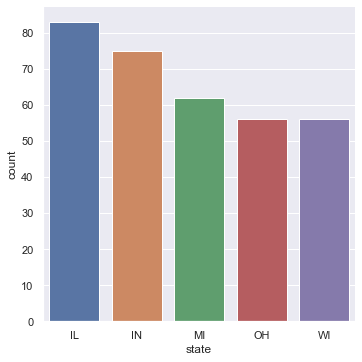

In [29]:
sns.catplot(x="state", kind="count", data=df)

kind="point" 绘制点图，展示数据点的估计值（默认平均值）和置信区间，并连接来自同一hue类别的点。

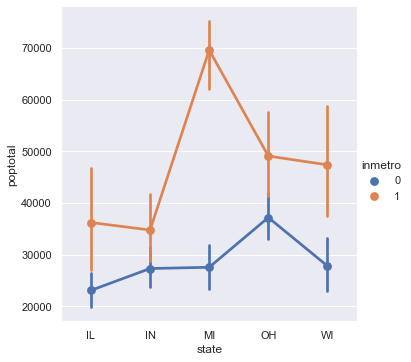

In [30]:
sns.catplot(x="state", y="poptotal", hue="inmetro", kind="point", data=df)

4. 回归图
seaborn 提供线性回归函数对数据拟合，包括regplot()和lmplot()，它俩大部分功能是一样的，只是输入的数据和输出图形稍有不同。

用lmplot()函数可以绘制两个变量x、y的散点图，拟合回归模型并绘制回归线和该回归的 95% 置信区间。


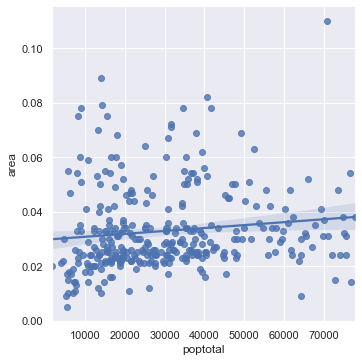

In [32]:
sns.lmplot(x="poptotal", y="area", data=df);

设置order参数可以拟合多项式回归模型

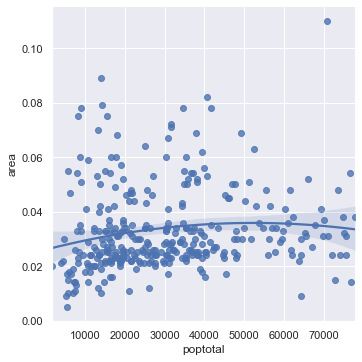

In [33]:
sns.lmplot(x="poptotal", y="area", data=df, order=2);

设置logistic=True参数可以拟合逻辑回归模型


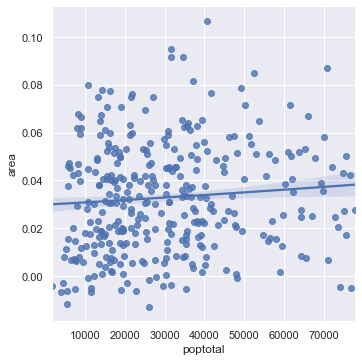

In [34]:
sns.lmplot(x="poptotal", y="area", data=df, logistic=True, y_jitter=.03);

5. 多图网格
seaborn 提供了FacetGrid类可以同时绘制多图。


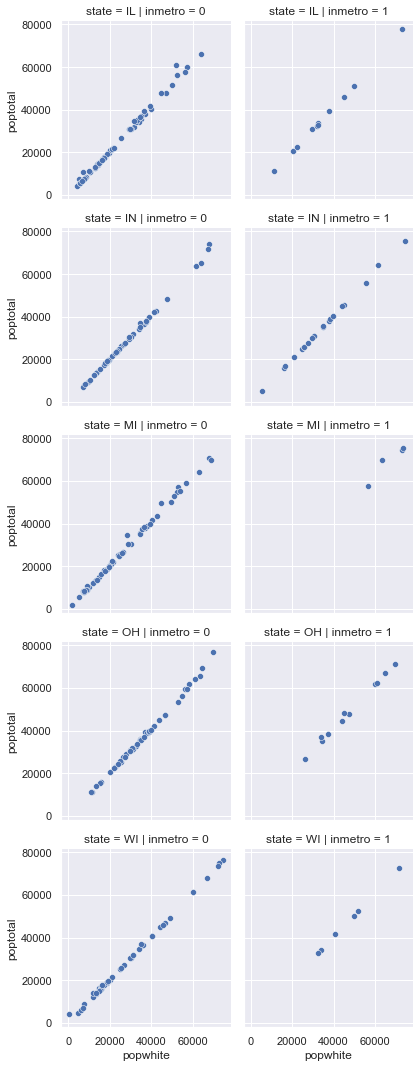

In [38]:
g = sns.FacetGrid(df, row="state", col="inmetro")
g.map(sns.scatterplot, "popwhite", "poptotal")

实际上它等价于下面这段代码

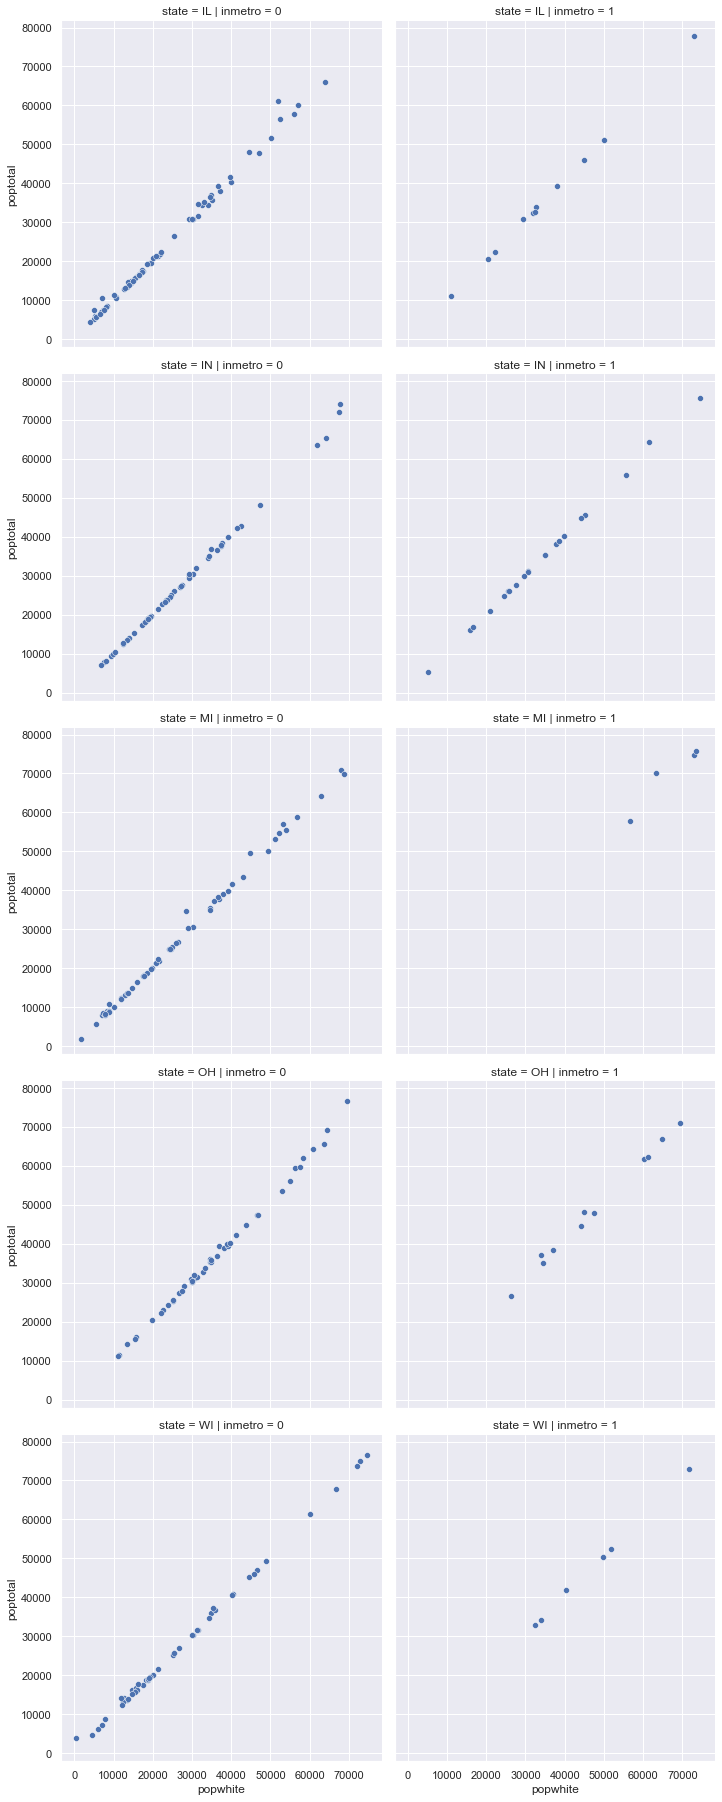

In [37]:
sns.relplot(x='popwhite', y='poptotal', row="state", col="inmetro", data=df)

另外，seaborn 还提供了PairGrid，可以为多变量同时绘图，且图形种类可以不同。


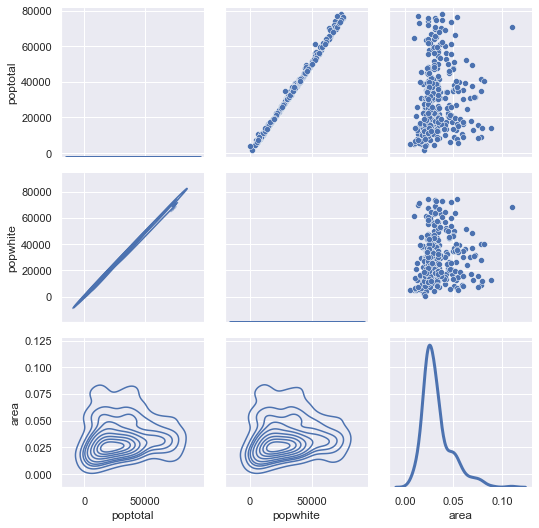

In [41]:
data = df[['poptotal', 'popwhite', 'area']]
g = sns.PairGrid(data)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=3, legend=False)

上图中，对角线以及对角线下方是 KDE 图，对角线上方是散点图。